In [167]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\mac\\desktop\\kaggle\\kaggle'

In [4]:
os.chdir("C:\Users\mac\Desktop\Kaggle\Kaggle\Titanic")

In [5]:
os.getcwd()

'C:\\Users\\mac\\Desktop\\Kaggle\\Kaggle\\Titanic'

In [6]:
df=pd.read_csv('train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


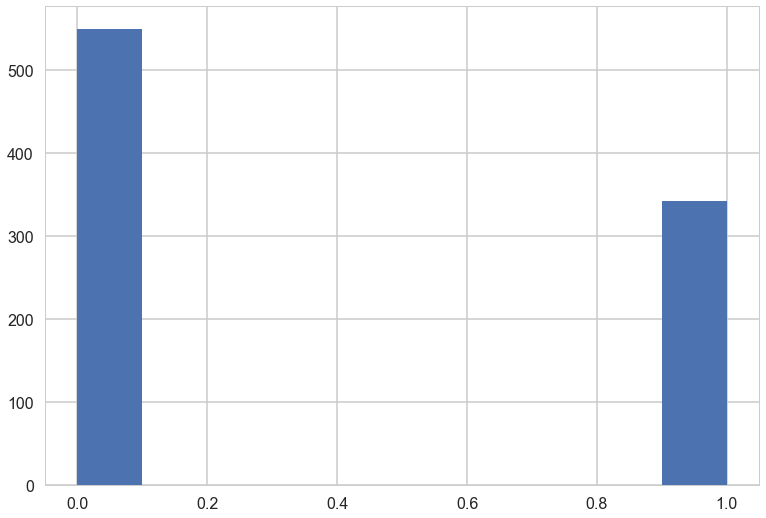

In [10]:
df['Survived'].hist()

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
new_df=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [42]:
resp=df['Survived'].values

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [13]:
accuracy_score

In [68]:
# check miising value
new_df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [71]:
new_df[new_df['Age'].isnull()].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,3,male,NaN,0,0,8.4583,Q
17,2,male,NaN,0,0,13.0000,S
19,3,female,NaN,0,0,7.2250,C
26,3,male,NaN,0,0,7.2250,C
28,3,female,NaN,0,0,7.8792,Q


In [66]:
new_df[new_df['Embarked'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,female,38.0,0,0,80.0,NaN
829,1,female,62.0,0,0,80.0,NaN


In [84]:
new_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [78]:
new_df['Age'].fillna(new_df['Age'].mean(),inplace=True)

In [88]:
new_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [89]:
new_df['Embarked'].fillna('S',inplace=True)

In [91]:
new_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [102]:
new_df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
# One way to do that is by dropping the rows that have missing values:
# df.dropna()

# Or the columns that have missing values:
# df.dropna(axis=1)

In [94]:
new_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [183]:
new_df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [211]:
new_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [224]:
# male is 1 female is 0
new_df['Sex']=(new_df['Sex']=='male')*1

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


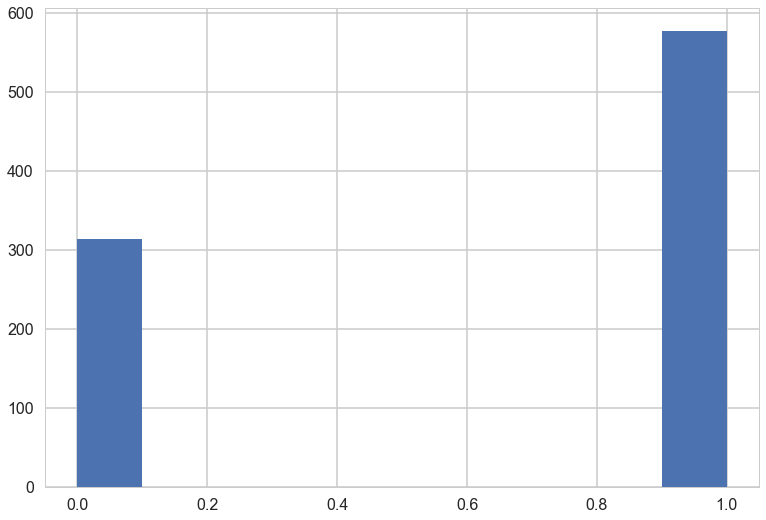

In [225]:
new_df['Sex'].hist()

In [226]:
new_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,S,0
1,1,0,38.0,1,0,71.2833,C,1


In [264]:
clflog = LogisticRegression(penalty="l1")
clflog.fit(new_df[['Age','Fare','SibSp','Parch','Pclass','Sex']],resp)
predit_value=clflog.predict(new_df[['Age','Fare','SibSp','Parch','Pclass','Sex']])

In [265]:
accuracy_score(new_df[['Survived']],predit_value)

0.80134680134680136

In [143]:
test_df=pd.read_csv('test.csv')

In [233]:
test_gdtrue=pd.read_csv('C:\Users\mac\Desktop\Kaggle\Kaggle\Titanic\gender_submission.csv')

In [236]:
test_gdtrue['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [255]:
test_df['Fare'].head()

0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
Name: Fare, dtype: float64

In [252]:
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)
test_df['Embarked'].fillna('S',inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
# male is 1 female is 0
test_df['Sex']=(test_df['Sex']=='male')*1

In [253]:
# check miising value
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [254]:
# testing
# clflog = LogisticRegression(penalty="l1")
# clflog.fit(test_df[['Age','Fare','SibSp','Parch','Pclass','Sex']],test_df['Survived'])
predit_value=clflog.predict(test_df[['Age','Fare','SibSp','Parch','Pclass','Sex']])

In [230]:
new_df[['Age']].describe()

,Age
count,891.000000
mean,29.699118
std,13.002015
min,0.420000
25%,22.000000
50%,29.699118
75%,35.000000
max,80.000000


In [105]:
# fit logistic regression model
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

# statsmodels works nicely with pandas dataframes
# dat = pd.DataFrame(new_df, columns = ['Temperature', 'Failure'])
logit_model = logit('Survived ~ Age',new_df).fit()
print logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.663456
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Oct 2017   Pseudo R-squ.:                0.003688
Time:                        17:28:40   Log-Likelihood:                -591.14
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                   0.03643
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1433      0.172     -0.832      0.405        -0.481     0.194
Age           -0.0112      0.

In [153]:
ls

 Volume in drive C is BOOTCAMP
 Volume Serial Number is F211-E14E

 Directory of C:\Users\mac\Desktop\Kaggle\Kaggle

10/08/2017  05:53 PM    <DIR>          .
10/08/2017  05:53 PM    <DIR>          ..
10/07/2017  04:48 PM    <DIR>          .ipynb_checkpoints
10/08/2017  05:53 PM            46,662 CRISP-DM.jpg
09/12/2017  11:54 PM         6,597,229 Data-Mining-Methods-and-Models-Larose-2006.pdf
10/07/2017  04:46 PM             1,209 GitHup_User_Instruction
10/07/2017  04:46 PM               207 Install_Python_lib
10/07/2017  04:36 PM                 8 README.md
10/07/2017  04:32 PM    <DIR>          Titanic
10/08/2017  05:53 PM            48,418 Titanic_Competition.ipynb
               6 File(s)      6,693,733 bytes
               4 Dir(s)  56,074,067,968 bytes free


In [174]:
from IPython.display import Image
Image(url='CRISP_DM.PNG')

## Cross-Industry Standard Process for Data Mining (CRISP–DM).


1. ### Business understanding phase. 
The first phase in the CRISP–DM standard process may also be termed the research understanding phase.
a. Enunciate the project objectives and requirements clearly in terms of the
business or research unit as a whole.
b. Translate these goals and restrictions into the formulation of a data mining
problem definition.
c. Prepare a preliminary strategy for achieving these objectives.

2. ### Data understanding phase
a. Collect the data.
b. Use exploratory data analysis to familiarize yourself with the data, and discover
initial insights.
c. Evaluate the quality of the data.
d. If desired, select interesting subsets that may contain actionable patterns.

3. ### Data preparation phase
a. This labor-intensive phase covers all aspects of preparing the final data set,
which will be used for subsequent phases, from the initial, raw, dirty data.
b. Select the cases and variables you want to analyze and that are appropriate
for your analysis.
c. Perform transformations on certain variables, if needed.
d. Clean the raw data so that it is ready for the modeling tools.

4. ### Modeling phase
a. Select and apply appropriate modeling techniques.
b. Calibrate model settings to optimize results.
c. Often, several different techniques may be applied for the same data mining
problem.
d. Loop back to the data preparation phase as required to bring the form of
the data into line with the specific requirements of a particular data mining
technique.

5. ### Evaluation phase
a. The modeling phase has delivered one or more models. These models must
be evaluated for quality and effectiveness before we deploy them for use in
the field.
b. Determine whether the model in fact achieves the objectives set for it in
phase 1.
c. Establish whether some important facet of the business or research problem
has not been accounted for sufficiently.
d. Finally, come to a decision regarding the use of the data mining results.

6. ### Deployment phase
a. Model creation does not signify the completion of the project. Need to make
use of created models according to business objectives.
b. Example of a simple deployment: Generate a report.
c. Example of a more complex deployment: Implement a parallel data mining
process in another department.
d. For businesses, the customer often carries out the deployment based on your
model.

In [ ]:
# Test and Training Sets, and Standardization

In [ ]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)
In [528]:
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
In [529]:
mask
Out[529]:
array([False,  True,  True, ..., False,  True,  True], dtype=bool)
In [530]:
mask.shape, mask.sum()

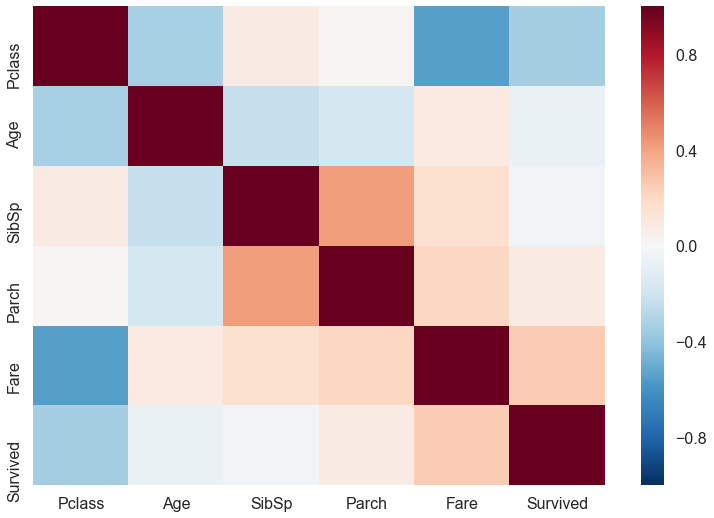

In [175]:
import seaborn as sns
corr = new_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [262]:
from sklearn.cross_validation import train_test_split
?train_test_split(xrange(new_df.shape[0]), train_size=0.7)

In [ ]:
mask=np.ones(new_df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)